# <font color='red'> LESSON 3B: Regression model </font>

  * <span style="color:blue">**Regressors**</span> 
    * linear with numerical label
    * random forest regressor
  * <span style="color:blue">**Regression model:**</span>
    * feature selection - correlation
    * model preparation
    * model interpretation

## Regression tasks
GOAL: To predict the outcome of a given sample where the output variable is continuous quantity.
Example labels such as: sale price, age, size, quantities

This means that we can use the following algorithms:

* Linear regression
* Lasso regression
* Ridge regression
* Regression tree
* Random forest
* Gradient Boosting 
* Support Vector Regression
* K Nearest Neighbours Regressors
* Gaussian Process Regression
* Neural Network Models


We will start on those that we are more familiar with: Linear regression.

### Our dataset after datamart fine-tuning

In [42]:
import pandas as pd
import numpy as np

data = pd.read_parquet('./data/full_data.parquet')
data

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label
1,0,0,0,1,0,0,1,0,0,1,...,0.532289,0.289638,-0.796041,-0.502349,-0.051541,1.768105,-0.811747,-0.359325,-0.270208,208500
2,0,1,0,0,0,0,1,0,0,1,...,-0.327437,-0.653917,1.191828,0.586571,0.663315,-0.787243,-0.011497,-0.359325,-0.270208,181500
3,0,0,0,1,0,0,1,0,0,1,...,-0.739702,-0.540801,0.939328,0.443182,0.827539,-0.787243,-0.144872,4.092524,-0.270208,223500
4,0,0,0,0,1,0,1,0,0,1,...,0.238172,-0.033157,1.621080,1.442744,1.764579,0.859156,0.788753,-0.359325,-0.270208,140000
5,0,0,0,1,0,0,1,0,0,1,...,-0.639150,-0.996025,0.503190,-0.294540,0.045061,-0.444243,-0.240140,-0.359325,-0.270208,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,0,0,1,0,0,0,1,...,-0.244481,-0.562873,0.797009,0.297716,-0.051541,-0.787243,-0.049605,-0.359325,-0.270208,185000
1456,0,0,0,1,0,0,1,0,0,1,...,1.236157,2.527134,-0.796041,1.182983,0.141664,2.205430,-0.811747,-0.359325,-0.270208,175000
1457,0,1,0,0,0,0,1,0,0,1,...,0.255769,0.085477,1.848330,1.737833,-1.056203,-0.787243,0.331467,-0.359325,-0.270208,210000
1458,0,0,0,0,1,0,1,0,0,1,...,0.069746,-0.218006,-0.796041,-0.884718,-1.114164,2.351205,-0.811747,1.473789,-0.270208,266500


## Feature selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable.

The main reasons for performing feature selection are:

* **Reduces Overfitting**: Less redundant data decreases the possibility of making decisions based on noise.
* **Improves Accuracy**: Irrelevant features can decrease accuracy, hence less misleading data means better accuracy.
* **Reduces Training Time**: Less data results in faster training.

### Correlation

Calculate correlation to see the relationships among features and how features are correlated with label variable

In [43]:
corrmat = data.corr()
display(corrmat)

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label
MSSubClass_120,1.000000,-0.191612,-0.083330,-0.127847,-0.153164,0.018835,-0.067827,0.064958,-0.016182,0.016182,...,0.014470,0.013293,-0.007046,-0.007528,0.028575,0.012044,0.023244,-0.051589,-0.003333,0.062876
MSSubClass_20,-0.191612,1.000000,-0.251802,-0.386320,-0.462822,-0.090389,0.296961,-0.279025,-0.004448,0.004448,...,-0.039206,-0.003934,0.005423,-0.000939,-0.003061,-0.022381,-0.021405,0.055631,-0.006789,0.041680
MSSubClass_50,-0.083330,-0.251802,1.000000,-0.168006,-0.201276,-0.037835,-0.143438,0.190056,-0.021265,0.021265,...,0.009432,0.009238,-0.025421,-0.022229,-0.026717,-0.014487,0.014529,-0.027094,0.003163,-0.156803
MSSubClass_60,-0.127847,-0.386320,-0.168006,1.000000,-0.308802,0.044593,0.155118,-0.208026,-0.032625,0.032625,...,-0.003495,-0.006387,-0.013530,-0.008318,0.010967,0.011063,-0.018521,-0.025860,-0.001441,0.377107
MSSubClass_OTHER,-0.153164,-0.462822,-0.201276,-0.308802,1.000000,0.072937,-0.330816,0.329664,0.057405,-0.057405,...,0.031678,-0.003219,0.027251,0.027529,-0.003941,0.017542,0.017914,0.008845,0.008332,-0.316290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WoodDeckSF,0.012044,-0.022381,-0.014487,0.011063,0.017542,0.002548,-0.042174,0.046607,0.013938,-0.013938,...,0.241586,0.237740,0.090509,0.243334,0.232384,1.000000,0.081329,-0.128080,-0.079674,0.000744
OpenPorchSF,0.023244,-0.021405,0.014529,-0.018521,0.017914,-0.016345,-0.022445,0.036812,0.019269,-0.019269,...,0.249805,0.204643,0.218924,0.347559,0.277068,0.081329,1.000000,-0.108770,0.034773,-0.012327
EnclosedPorch,-0.051589,0.055631,-0.027094,-0.025860,0.008845,0.014970,0.009428,-0.020960,0.066448,-0.066448,...,-0.107425,-0.080782,0.062580,0.009872,-0.122150,-0.128080,-0.108770,1.000000,-0.082937,0.025795
ScreenPorch,-0.003333,-0.006789,0.003163,-0.001441,0.008332,-0.013241,0.013480,-0.006467,-0.017370,0.017370,...,0.091021,0.096794,0.041037,0.104310,0.052832,-0.079674,0.034773,-0.082937,1.000000,-0.035649


### Removing correlated columns

First, let's remove correlated columns to prevent multicollinearity - situation, when predictors are correlated to other predictors. Predictors with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [44]:
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
X = data[selected_columns]

display(X)

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label
1,0,0,0,1,0,0,1,0,0,1,...,0.532289,0.289638,-0.796041,-0.502349,-0.051541,1.768105,-0.811747,-0.359325,-0.270208,208500
2,0,1,0,0,0,0,1,0,0,1,...,-0.327437,-0.653917,1.191828,0.586571,0.663315,-0.787243,-0.011497,-0.359325,-0.270208,181500
3,0,0,0,1,0,0,1,0,0,1,...,-0.739702,-0.540801,0.939328,0.443182,0.827539,-0.787243,-0.144872,4.092524,-0.270208,223500
4,0,0,0,0,1,0,1,0,0,1,...,0.238172,-0.033157,1.621080,1.442744,1.764579,0.859156,0.788753,-0.359325,-0.270208,140000
5,0,0,0,1,0,0,1,0,0,1,...,-0.639150,-0.996025,0.503190,-0.294540,0.045061,-0.444243,-0.240140,-0.359325,-0.270208,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,0,0,1,0,0,0,1,...,-0.244481,-0.562873,0.797009,0.297716,-0.051541,-0.787243,-0.049605,-0.359325,-0.270208,185000
1456,0,0,0,1,0,0,1,0,0,1,...,1.236157,2.527134,-0.796041,1.182983,0.141664,2.205430,-0.811747,-0.359325,-0.270208,175000
1457,0,1,0,0,0,0,1,0,0,1,...,0.255769,0.085477,1.848330,1.737833,-1.056203,-0.787243,0.331467,-0.359325,-0.270208,210000
1458,0,0,0,0,1,0,1,0,0,1,...,0.069746,-0.218006,-0.796041,-0.884718,-1.114164,2.351205,-0.811747,1.473789,-0.270208,266500


### Selecting predictors with high correlation to target

To reduce number of predictors, you can select the ones correlated with target variable, exceeding given correlation threshold

Select relevant features, e.g. those with correlation to target value greater than 0.5

In [45]:
rel_vars = corrmat.label[(corrmat.label > 0.5)]
rel_cols = list(rel_vars.index.values)

Visualize predictors with high correlation to the target variable

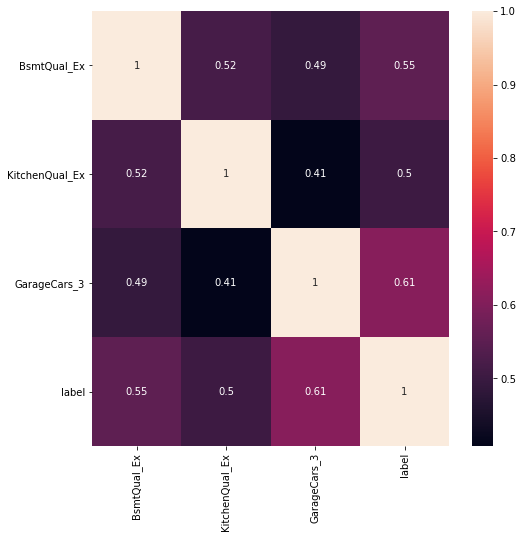

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data[rel_cols].corr()
plt.figure(figsize=(8,8))
hm = sns.heatmap(corr, annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

Use subset of original dataset containing only selected features. The dataset also contains both features and labels, so we need to separate them

In [47]:
X_sel = data[rel_cols[:-1]].iloc[:,0:].values
y = data.iloc[:, -1].values

display(X_sel.shape)
display(y.shape)

(1459, 3)

(1459,)

### Features selection using f_regression()

Similarly, feature selection can be performed using **f_regression()** function

Using **SelectKBest()** function we select *k* best features

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=20)

X = X.drop('label', axis=1)
X = fs.fit_transform(X, y)
display(X.shape)

(1459, 20)

## Model preparation

### Splitting dataset into train and test
Let's split our dataset into train and test, it is important these two do not mix during the training.
This means we will train on 70% of the data and test on the remaining 30%.

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 20)
(438, 20)
(1021,)
(438,)


### <font color='orange'>Linear Regression</font>
We have prepared data for the model training. We can now use them to train a simple Linear regression.

Basic info about Linear Regression:
* Predicts continuous variable
* Assumes the relationship between a dependent continuous variable Y and one or more explanatory variables X is linear
* Easy to interpret the results
* Sensitive to outliers
* **Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Predicted variable is a linear equation:
$$ y_i =\beta_0+\beta_1x_1 ... $$

**y** is response variable

**x** is feature

**beta_0** is the intercept (the value of  y  when  x = 0)

**beta_1**  is the slope (the change in  y  divided by change in  x) = coefficient for each x

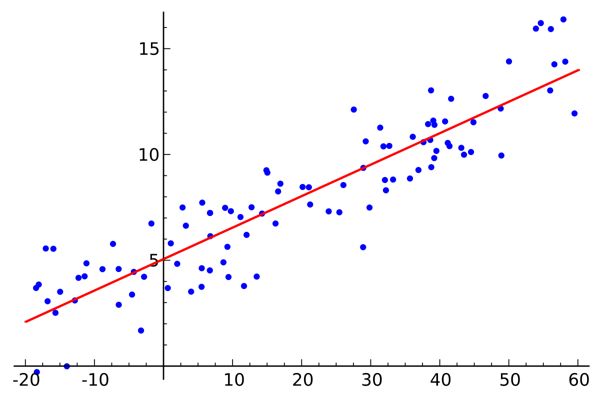

In [50]:
from PIL import Image, ImageOps

Image.open('images/linear_regression.png').resize((600,397))

Define model with default parameters

In [51]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

Fit the model

In [52]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [53]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 1.]])

Show model's intercept and coefficients

In [54]:
display(lin_model.intercept_)
display(lin_model.coef_)

272171.5903296746

array([ 12516.51730265,  21799.81461062,  -6152.2083789 , -20600.26859446,
         7541.49416918,  38295.30413042,   1105.58762323,  20338.974781  ,
         8517.27064303, -96087.81405881, -73959.98306164,  56187.45700931,
        -9978.01070092, -30087.25638962,   8627.98404026,  -3657.92867442,
        -7995.28103545,  49521.0885694 , -18052.00923723,   -519.75289658])

Make predictions based on test dataset

In [55]:
lin_model.coef_[0]

12516.517302652997

In [56]:
y_pred = lin_model.predict(x_test)

Visualizing predictions and target values

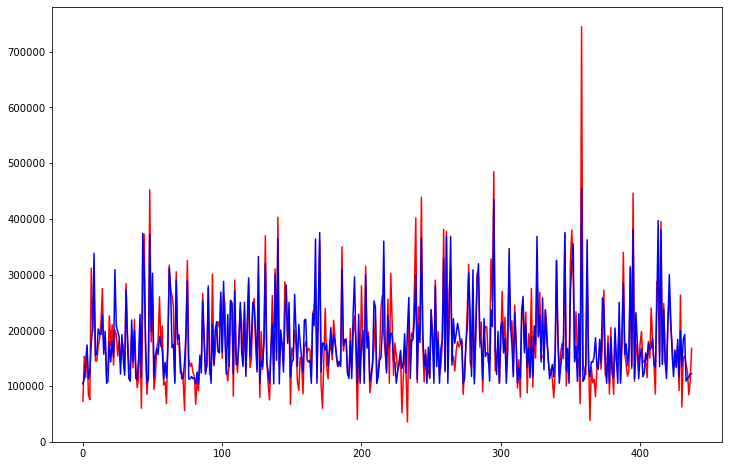

In [57]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()

### <font color='orange'>Regression Tree</font>

Decision tree is a supervised machine learning algorithm. It has a tree-like structure with its root node at the top. A regression tree is used to predict continuous target variable.

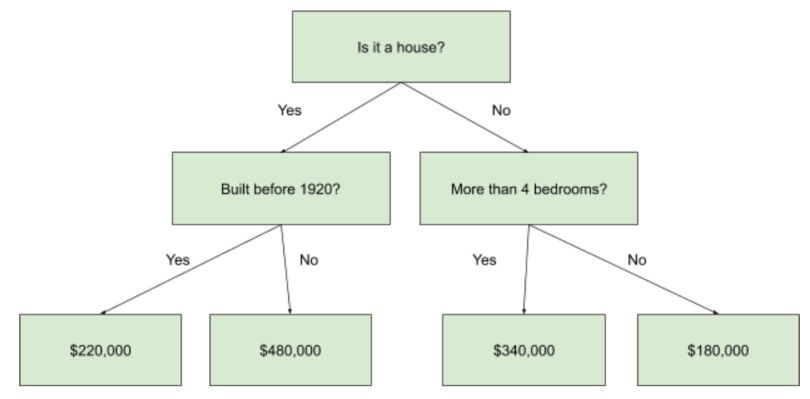

In [58]:
from PIL import Image, ImageOps
Image.open('images/tree.png')

In [59]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

### <font color='orange'>Random Forest Regressor</font>

Random forest uses multiple decision trees for predicting the output. 

The random forest algorithm goes as followed:

* Builds *n* decision tree regressors given specified hyperparameters (e.g. minimum number of samples at the leaf nodes, maximum depth that a tree can grow, etc.)
* Since there are multiple decision trees, multiple output values will be predicted via a random forest algorithm. As final prediction is taken the average of all predicted values



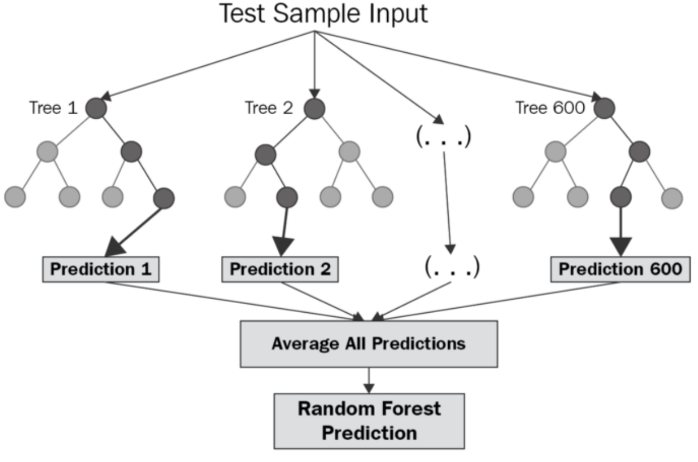

In [60]:
from PIL import Image, ImageOps
Image.open('images/forest.png')

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 2000, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=2000, random_state=42)

Look at parameters currently in use

In [62]:
display(rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Let's try adjusting the following set of hyperparameters:

* **n_estimators** = number of trees in the forset
* **max_features** = max number of features considered for splitting a node
* **max_depth** = max number of levels in each decision tree
* **min_samples_split** = min number of data points placed in a node before the node is split
* **min_samples_leaf** = min number of data points allowed in a leaf node
* **bootstrap** = method for sampling data points (with or without replacement)


Create a parameter grid

In [64]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

display(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

Use the parameter grid to search for best hyperparameters

In [65]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation across 10 different combinations
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=2000,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Show best hyperparameters based on randomized grid search

In [66]:
display(rf_random.best_params_)

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

Select the best model

In [67]:
best_rf_model = rf_random.best_estimator_

### <font color='orange'>Gradient Boosting Regressor</font>

Gradient boosting involves these main steps:

* Defining a loss function which needs to be optimized
* Selecting a weak learner to make predictions
* Use and additive model to add weak learners to minimize the loss function

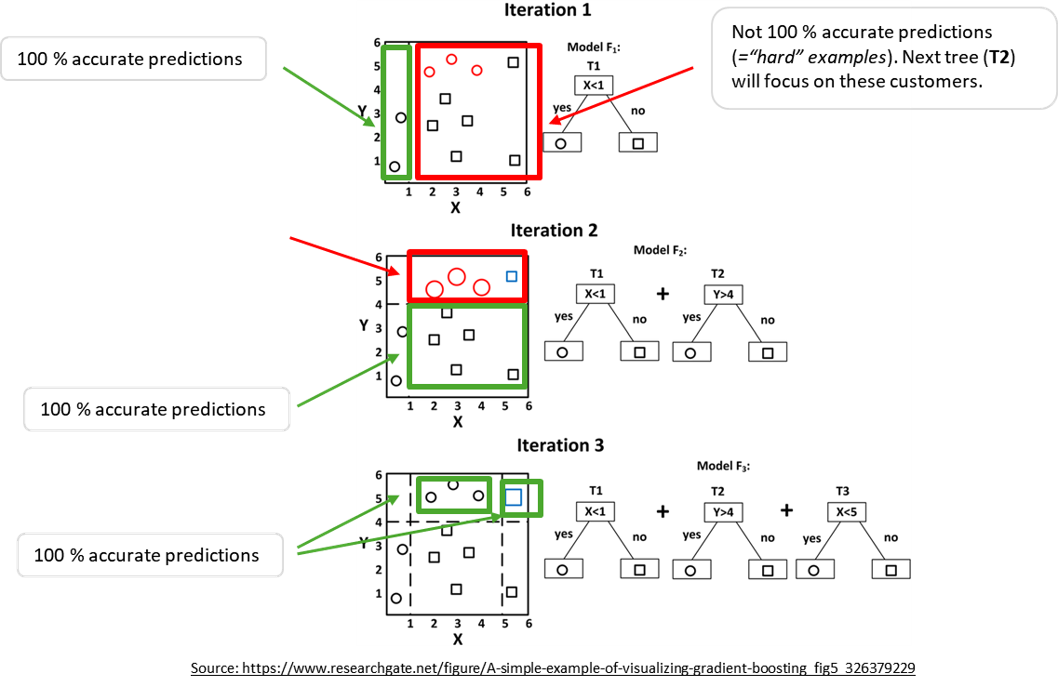

In [68]:
from PIL import Image, ImageOps
Image.open('images/GradientBoosting.png')

Default gradient boosting model

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

Gradient boosting model with set parameters

In [70]:
gbp_model = GradientBoostingRegressor(n_estimators=3000, 
                                      learning_rate=0.05,
                                      max_depth=4, 
                                      max_features='sqrt',
                                      min_samples_leaf=15, 
                                      min_samples_split=10, 
                                      loss='huber', 
                                      random_state=42)

gbp_model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=42)

## Evaluation metrics

With trained model we can evalute its performance. Performance metrics are different for regression and classification. The most often used metrics for evaluating regression models are:

* **R2 score**: This score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.
* **Mean squared error**: This is the average of the squares of the errors of all the data points in the given dataset. 
* **Root mean squared error = RMSE**: This is the root of mean squared error.
* **Mean absolute error**: This is the average of absolute errors of all the data points in the given dataset.
* **Median absolute error**: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.



In [71]:
import sklearn.metrics as sm

def evaluate_model(y_test, y_pred):
    print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))
    print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
    print("RMSE =", round((np.sqrt(sm.mean_squared_error(y_test, y_pred))), 10))
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))  

### Evaluation of linear model

In [72]:
y_pred = lin_model.predict(x_test)
evaluate_model(y_test, y_pred)

R2 score = 0.73
Mean squared error = 1707252603.0
RMSE = 41318.9133811381
Mean absolute error = 29020.97
Median absolute error = 21318.99


### Evaluation of regression tree model

In [73]:
y_pred = dt_model.predict(x_test)
evaluate_model(y_test, y_pred)

R2 score = 0.64
Mean squared error = 2264963502.03
RMSE = 47591.6326892394
Mean absolute error = 32839.76
Median absolute error = 22718.25


### Evaluation of random forest model

Without hyper-parameter optimization

In [74]:
y_pred = rf_model.predict(x_test)
evaluate_model(y_test, y_pred)

R2 score = 0.74
Mean squared error = 1597339171.04
RMSE = 39966.7257983032
Mean absolute error = 28889.29
Median absolute error = 21779.25


With hyper-parameter optimization

In [75]:
y_pred = best_rf_model.predict(x_test)
evaluate_model(y_test, y_pred)

R2 score = 0.76
Mean squared error = 1484373650.09
RMSE = 38527.5699998666
Mean absolute error = 27067.57
Median absolute error = 19472.05


### Evaluation of gradient boosting model

Model with default settings

In [76]:
y_pred = gb_model.predict(x_test)
evaluate_model(y_test, y_pred)

R2 score = 0.79
Mean squared error = 1327503743.17
RMSE = 36434.9247723791
Mean absolute error = 26579.37
Median absolute error = 19763.92


Model with set parameters

In [77]:
y_pred = gbp_model.predict(x_test)
evaluate_model(y_test, y_pred)

R2 score = 0.78
Mean squared error = 1375314066.98
RMSE = 37085.2270719976
Mean absolute error = 26855.34
Median absolute error = 19594.51


### Comparison of different models

In [78]:
lin_acc = lin_model.score(x_test, y_test)
dt_acc = dt_model.score(x_test, y_test)
rf_acc = rf_model.score(x_test, y_test)
rfo_acc = best_rf_model.score(x_test, y_test)
gb_acc = gb_model.score(x_test, y_test)
gbp_acc = gbp_model.score(x_test, y_test)

print("Accuracy Results\n" + "*"*40)
print("               Linear Model:", round(lin_acc, 4))
print("            Regression Tree:", round(dt_acc, 4))
print("        Random Forest Model:", round(rf_acc, 4))
print("   Random Forest Model Opt.:", round(rfo_acc, 4))
print("    Gradient Boosting Model:", round(gb_acc, 4))
print(" Gradient Boosting Model P.:", round(gbp_acc, 4))

Accuracy Results
****************************************
               Linear Model: 0.7252
            Regression Tree: 0.6355
        Random Forest Model: 0.7429
   Random Forest Model Opt.: 0.7611
    Gradient Boosting Model: 0.7864
 Gradient Boosting Model P.: 0.7787


### Exercises

1. With use of f_regression() function select 15 best predictors for target variable LotArea

In [39]:
# 1.
# Your solution

2. Use above selected predictors for building and fitting random forest model. Don't forget to split data into train and test (70/30)

In [40]:
# 2.
# Your solution

3. Predict values for test data and calculate R2

In [41]:
# 3.
# Your solution